In [191]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [192]:
# set path
crime_all_path = "crime-data/combined_wacrime.csv"

# read the csv file into pandas and remove unnamed columns
crime_all_df = pd.read_csv(crime_all_path, index_col=0, encoding="UTF-8")
crime_all_df.loc[:, ~crime_all_df.columns.str.contains('Unnamed')]
crime_all_df

,Month and Year,Homicide Total,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Recent Sexual Offence Total,Sexual Assault,Non-Assaultive Sexual Offences,Historical Sexual Offence Total,...,Graffiti,Fraud & Related Offences Total,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Violence Restraint Order Total,Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order,Total Selected Miscellaneous Offences
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,Jan-07,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,12.0,...,281.0,15.0,0.0,0.0,15.0,59.0,53.0,4.0,2.0,NaN
Armadale,Feb-07,0.0,0.0,0.0,0.0,0.0,16.0,10.0,6.0,6.0,...,276.0,28.0,1.0,0.0,27.0,45.0,27.0,15.0,3.0,349.0
Armadale,Mar-07,1.0,1.0,0.0,0.0,0.0,8.0,6.0,2.0,13.0,...,232.0,43.0,2.0,0.0,41.0,142.0,102.0,36.0,4.0,417.0
Armadale,Apr-07,0.0,0.0,0.0,0.0,0.0,29.0,26.0,3.0,16.0,...,96.0,7.0,0.0,0.0,7.0,50.0,37.0,10.0,3.0,153.0
Armadale,May-07,0.0,0.0,0.0,0.0,0.0,22.0,14.0,8.0,20.0,...,132.0,20.0,0.0,0.0,20.0,111.0,64.0,44.0,3.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,Jun-23,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,8.0,0.0,2.0,6.0,20.0,9.0,3.0,8.0,30.0
Wheatbelt,Jul-23,NaN,0.0,0.0,0.0,0.0,6.0,5.0,1.0,1.0,...,2.0,28.0,1.0,23.0,4.0,28.0,22.0,3.0,3.0,58.0
Wheatbelt,Aug-23,NaN,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,2.0,8.0,0.0,5.0,3.0,24.0,16.0,3.0,5.0,34.0


In [193]:
# drop the total columns
crime_all_df.drop(columns=['Homicide Total', 
                                   'Recent Sexual Offence Total', 
                                   'Historical Sexual Offence Total',
                                   'Assault (Family) Total',
                                   'Assault (Non-Family) Total',
                                   'Threatening Behaviour (Family) Total',
                                   'Threatening Behaviour (Non-Family) Total',
                                   'Deprivation of Liberty Total',
                                   'Robbery Total',
                                   'Burglary Total',
                                   'Stealing Total',
                                   'Property Damage Total',
                                   'Arson Total',
                                   'Drug Offences Total',
                                   'Receiving and Possession of Stolen Property Total',
                                   'Fraud & Related Offences Total',
                                   'Breach of Violence Restraint Order Total',
                                   'Total Selected Miscellaneous Offences'],
                                   axis=0, inplace=True)
crime_all_df

,Month and Year,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Sexual Assault.1,Non-Assaultive Sexual Offences.1,Serious Assault (Family),...,Receiving Stolen Property,Regulated Weapons Offences,Unnamed: 63,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,Jan-07,0.0,0.0,0.0,0.0,4.0,2.0,12.0,0.0,17.0,...,3.0,9.0,106.0,281.0,0.0,0.0,15.0,53.0,4.0,2.0
Armadale,Feb-07,0.0,0.0,0.0,0.0,10.0,6.0,6.0,0.0,15.0,...,3.0,14.0,132.0,276.0,1.0,0.0,27.0,27.0,15.0,3.0
Armadale,Mar-07,1.0,0.0,0.0,0.0,6.0,2.0,13.0,0.0,22.0,...,1.0,13.0,106.0,232.0,2.0,0.0,41.0,102.0,36.0,4.0
Armadale,Apr-07,0.0,0.0,0.0,0.0,26.0,3.0,15.0,1.0,19.0,...,3.0,5.0,185.0,96.0,0.0,0.0,7.0,37.0,10.0,3.0
Armadale,May-07,0.0,0.0,0.0,0.0,14.0,8.0,20.0,0.0,18.0,...,5.0,22.0,170.0,132.0,0.0,0.0,20.0,64.0,44.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,Jun-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,...,0.0,7.0,58.0,2.0,0.0,2.0,6.0,9.0,3.0,8.0
Wheatbelt,Jul-23,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,8.0,...,0.0,10.0,56.0,2.0,1.0,23.0,4.0,22.0,3.0,3.0
Wheatbelt,Aug-23,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,...,0.0,9.0,70.0,2.0,0.0,5.0,3.0,16.0,3.0,5.0


In [195]:
# drop null values and remaining unnamed columns
clean_df = crime_all_df.dropna()
cleaned_df = clean_df.drop(columns=["Unnamed: 32", "Unnamed: 51", "Unnamed: 52", "Unnamed: 63" ], axis=0)
cleaned_df2 = cleaned_df.drop(columns=["Month and Year"])
cleaned_df2

,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Sexual Assault.1,Non-Assaultive Sexual Offences.1,Serious Assault (Family),Common Assault (Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,0.0,0.0,0.0,0.0,4.0,2.0,12.0,0.0,17.0,56.0,...,4.0,3.0,9.0,281.0,0.0,0.0,15.0,53.0,4.0,2.0
Armadale,0.0,0.0,0.0,0.0,10.0,6.0,6.0,0.0,15.0,40.0,...,13.0,3.0,14.0,276.0,1.0,0.0,27.0,27.0,15.0,3.0
Armadale,1.0,0.0,0.0,0.0,6.0,2.0,13.0,0.0,22.0,40.0,...,6.0,1.0,13.0,232.0,2.0,0.0,41.0,102.0,36.0,4.0
Armadale,0.0,0.0,0.0,0.0,26.0,3.0,15.0,1.0,19.0,23.0,...,33.0,3.0,5.0,96.0,0.0,0.0,7.0,37.0,10.0,3.0
Armadale,0.0,0.0,0.0,0.0,14.0,8.0,20.0,0.0,18.0,22.0,...,5.0,5.0,22.0,132.0,0.0,0.0,20.0,64.0,44.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,0.0,0.0,0.0,0.0,5.0,3.0,8.0,3.0,19.0,34.0,...,2.0,0.0,13.0,5.0,0.0,11.0,5.0,14.0,12.0,3.0
Wheatbelt,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,39.0,...,12.0,0.0,7.0,2.0,0.0,2.0,6.0,9.0,3.0,8.0
Wheatbelt,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,8.0,38.0,...,1.0,0.0,10.0,2.0,1.0,23.0,4.0,22.0,3.0,3.0


In [196]:
# now that nulls are dropped, convert all to integer type
cleaned_df2 = cleaned_df2.astype(int)
cleaned_df2

,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Sexual Assault.1,Non-Assaultive Sexual Offences.1,Serious Assault (Family),Common Assault (Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,0,0,0,0,4,2,12,0,17,56,...,4,3,9,281,0,0,15,53,4,2
Armadale,0,0,0,0,10,6,6,0,15,40,...,13,3,14,276,1,0,27,27,15,3
Armadale,1,0,0,0,6,2,13,0,22,40,...,6,1,13,232,2,0,41,102,36,4
Armadale,0,0,0,0,26,3,15,1,19,23,...,33,3,5,96,0,0,7,37,10,3
Armadale,0,0,0,0,14,8,20,0,18,22,...,5,5,22,132,0,0,20,64,44,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,0,0,0,0,5,3,8,3,19,34,...,2,0,13,5,0,11,5,14,12,3
Wheatbelt,0,0,0,1,0,0,0,0,11,39,...,12,0,7,2,0,2,6,9,3,8
Wheatbelt,0,0,0,0,5,1,1,0,8,38,...,1,0,10,2,1,23,4,22,3,3


In [197]:
#count the total numbers of each type of crime
count_all = cleaned_df2.loc[:, "Murder" : "Breach of Police Order"].sum()
count_all

Murder                                                 976
Attempted / Conspiracy to Murder                       452
Manslaughter                                           274
Driving Causing Death                                 1584
Sexual Assault                                       77628
Non-Assaultive Sexual Offences                       35118
Sexual Assault.1                                     60914
Non-Assaultive Sexual Offences.1                      7248
Serious Assault (Family)                            122424
Common Assault (Family)                             430094
Serious Assault (Non-Family)                        146592
Common Assault (Non-Family)                         246052
Assault Police Officer                               34830
Threatening Behaviour (Family)                       59502
Possess Weapon to Cause Fear (Family)                18442
Threatening Behaviour (Non-Family)                   51840
Possess Weapon to Cause Fear (Non-Family)            518

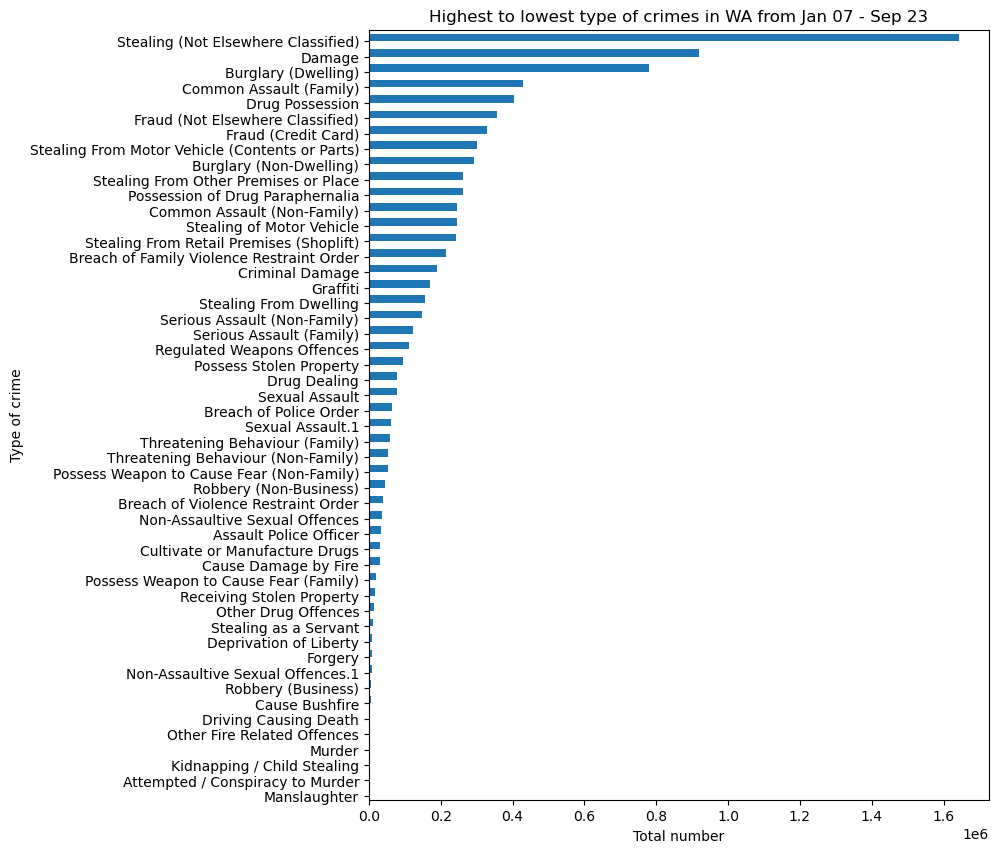

In [198]:
#display above results in bar graph from higest to lowest
types_plot = count_all.sort_values().plot(kind='barh', figsize=(8,10), alpha=1, align="edge")
plt.ylabel("Type of crime")
plt.xlabel("Total number")
plt.title("Highest to lowest type of crimes in WA from Jan 07 - Sep 23")
plt.show()

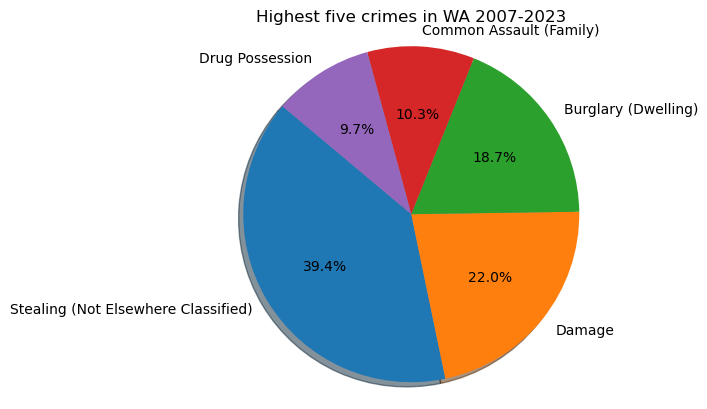

In [199]:
# different and easy visual of top five types of crime
top_5_crimes = count_all.sort_values(ascending=False).head(5)
top_5_crimes

# Labels for the sections of our pie chart
my_labels = ["Stealing (Not Elsewhere Classified)", "Damage", "Burglary (Dwelling)", "Common Assault (Family)","Drug Possession"]

plt.pie(top_5_crimes, labels=my_labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("Highest five crimes in WA 2007-2023")
plt.axis("equal")
plt.show()

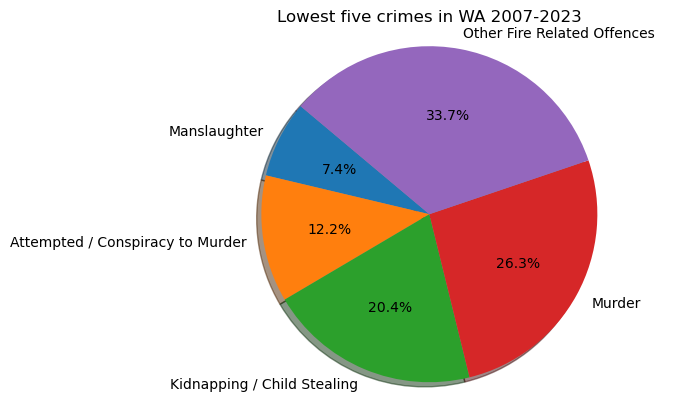

In [200]:
# now for lowest five types of crimes
low_5_crimes = count_all.sort_values(ascending=True).head(5)
low_5_crimes

# Labels for the sections of our pie chart
my_labels = ["Manslaughter","Attempted / Conspiracy to Murder", "Kidnapping / Child Stealing", "Murder", "Other Fire Related Offences"]

plt.pie(low_5_crimes, labels=my_labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("Lowest five crimes in WA 2007-2023")
plt.axis("equal")
plt.show()


In [201]:
# now looking at crime data by areas
region_df = cleaned_df.groupby(["Region"])
region_df

In [202]:
# find totals of each crime type in each area
totals_by_region = region_df.sum()
totals_by_region

,Month and Year,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Sexual Assault.1,Non-Assaultive Sexual Offences.1,Serious Assault (Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,33.0,19.0,9.0,60.0,3841.0,1338.0,2945.0,373.0,4551.0,...,3962.0,587.0,5874.0,9492.0,259.0,14869.0,14633.0,12836.0,1808.0,2340.0
Cannington,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,45.0,16.0,8.0,41.0,2766.0,1269.0,1948.0,238.0,4209.0,...,5822.0,875.0,4237.0,5424.0,634.0,27064.0,21544.0,7454.0,1679.0,2033.0
Fremantle,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,38.0,13.0,6.0,52.0,2790.0,1513.0,1968.0,146.0,3365.0,...,4161.0,844.0,4064.0,6263.0,438.0,22134.0,18214.0,8262.0,1451.0,1739.0
Goldfields-Esperance,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,23.0,5.0,11.0,53.0,1358.0,558.0,1158.0,106.0,4433.0,...,1385.0,396.0,2202.0,1337.0,111.0,2357.0,5187.0,3504.0,582.0,2199.0
Great_Southern,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,8.0,14.0,5.0,38.0,1226.0,502.0,1446.0,144.0,1554.0,...,1042.0,267.0,2727.0,1308.0,33.0,1979.0,4815.0,2911.0,847.0,1417.0
Joondalup,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,49.0,24.0,14.0,63.0,4171.0,1987.0,3124.0,316.0,3544.0,...,5107.0,867.0,5392.0,7632.0,319.0,10786.0,15454.0,11919.0,2032.0,2456.0
Kimberley,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,36.0,8.0,15.0,58.0,2182.0,345.0,1429.0,171.0,11575.0,...,950.0,448.0,1407.0,1031.0,66.0,1880.0,3057.0,7085.0,945.0,4131.0
Mandurah,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,41.0,35.0,17.0,64.0,4657.0,1511.0,3797.0,321.0,4318.0,...,3540.0,572.0,6043.0,9150.0,244.0,10965.0,13165.0,12783.0,2232.0,2907.0
Metropolitan,Jan-07Feb-07Mar-07Apr-07May-07Jun-07Jul-07Aug-...,336.0,176.0,83.0,408.0,27906.0,13895.0,21097.0,2395.0,30732.0,...,38908.0,6250.0,39691.0,72960.0,3392.0,148732.0,144549.0,76515.0,14035.0,17187.0
